In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
mtcars = pd.read_csv('/home/margaretawdy/Downloads/mtcars.csv')

In [4]:
mtcars.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Menambahkan kolom mpg_level dengan ketentuan
- mpg < 20 = low
- mpg >= 20 & < 30 = medium
- mpg > 30 = high

In [6]:
mtcars['mpg_level'] = np.where(mtcars['mpg'] < 20, 'low', 
                              (np.where(mtcars['mpg'] > 30, 'high',
                                       'medium')))

In [7]:
mtcars['mpg_level'].head()

0    medium
1    medium
2    medium
3    medium
4       low
Name: mpg_level, dtype: object

Menampilkan Rata-rata, Q1, Q2, Q3, Nilai min, dan Nilai max pada tiap kolom

In [8]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Menampilkan histogram untuk variabel 'mpg'

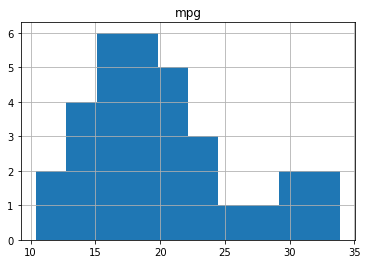

In [10]:
mpgHisto = mtcars.hist(column='mpg')

Menampilkan kernel density estimation menggunakan variabel 'wt'

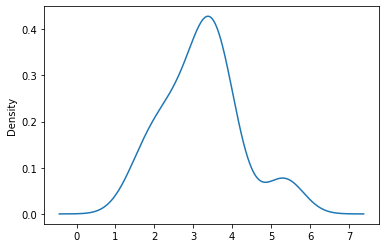

In [11]:
wtKDE = mtcars['wt'].plot.kde()

Menampilkan berapa banyak mobil dengan banyak gear yang sama menggunakan pie chart

In [14]:
gearPie = mtcars.groupby('gear', as_index=False)['Cars'].count()

In [15]:
gearPie.rename(index = {0 : 'gear 3', 1 : 'gear 4', 2 : 'gear 5'},
              inplace=True)

In [16]:
gearPie

,gear,Cars
gear 3,3,15
gear 4,4,12
gear 5,5,5


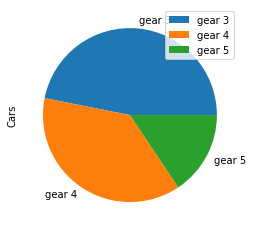

In [17]:
gearPie = gearPie.plot.pie(y='Cars')

Menampilkan 'mpg_level' menggunakan barchart 

In [18]:
mpgLevelBar = mtcars.groupby('mpg_level', as_index=False)['Cars'].count()

In [19]:
mpgLevelBar

,mpg_level,Cars
0,high,4
1,low,18
2,medium,10


In [20]:
sortingLevel = mpgLevelBar.sort_values('Cars', ascending=False)

In [21]:
sortingLevel

,mpg_level,Cars
1,low,18
2,medium,10
0,high,4


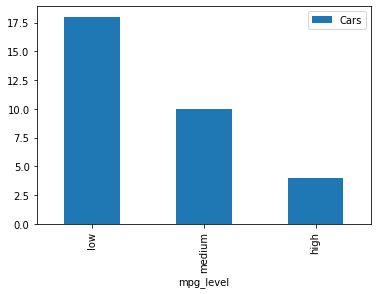

In [22]:
mpgLevelBar = sortingLevel.plot.bar(x = 'mpg_level')

Menampilkan korelasi antara 'cyl' dengan 'disp' menggunakan Scatter Plot

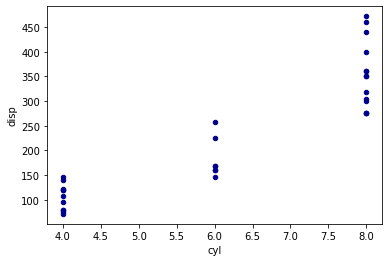

In [23]:
korelasiCylDisp = mtcars.plot.scatter(x = 'cyl', y = 'disp',
                                     c = 'DarkBlue')

Menunjukkan bahwa variabel cyl dan disp memiliki korelasi sehingga membentuk pola. 

Menampilkan korelasi antar variabel

In [24]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
